# 10. Green's functions

A **Green's function** is a solution to an inhomogenous differential equation with a [delta_function](09_fourier_transform.ipynb#delta_function) "driving term".  Its main purpose is to provide an easy method to solve more complicated inhomogenous differential equations.  In physics, Green's functions methods are used to describe a wide range of phenomena, such as the motion of mechanical oscillators subjected to arbitrary time-dependent driving forces, or the sound waves emitted by loudspeakers of arbitrarily complicated shapes.

## The driven harmonic oscillator<a name="driven-oscillator"></a>

As an introduction to the Green's function technique, we will study an elementary example consisting of a **driven harmonic oscillator**, which is a [damped harmonic oscillator](04_complex_oscillations.ipynb) subjected to an arbitrary driving force.  The equation of motion of a driven harmonic oscillator is

$$\left[\frac{d^2}{dt^2} + 2 \gamma \frac{d}{dt} + \omega_0^2\right] x(t) = \frac{f(t)}{m},$$

where
* $m$ is the mass of the particle
* $\gamma$ is the damping constant
* $\omega_0$ is the natural frequency of the oscillator
* $f(t)$ is the time-dependent driving force.

We are interested in solving for $x(t)$ for a given (arbitrarily complicated) driving force $f(t)$.

### Green's function for the driven harmonic oscillator

Before solving the general driven harmonic oscillator problem, let's consider this slightly simpler problem:

$$\left[\frac{\partial^2}{\partial t^2} + 2 \gamma \frac{\partial}{\partial t} + \omega_0^2\right] G(t, t') = \delta(t-t').$$

This differential equation is called the **Green's function equation**.  The function $G(t,t')$, which depends on the two variables $t$ and $t'$, is called the **Green's function**.  Note that the differential operator on the left-hand side involves only derivatives in $t$.

The Green's function describes the motion of a damped harmonic oscillator which is subjected to a particular choice of driving force, which is an infinitesimally sharp "pulse":

$$f(t) = m\,\delta(t-t').$$

Here, $\delta(t-t')$ denotes a [delta function](09_fourier_transform.ipynb#delta_function) centered at $t = t'$.

Why do we care about the Green's function?  Because as soon as we can find the Green's function, we can automatically produce a solution to the driven harmonic oscillator equation for *any* given driving force $f(t)$.  That solution is

$$x(t) = \int^\infty_{-\infty} dt' \; G(t,t') \frac{f(t')}{m}.$$

To show mathematically that this is indeed a solution, plug this into the equation of motion:

$$\begin{align}\left[\frac{d^2}{dt^2} + 2 \gamma \frac{d}{dt} + \omega_0^2\right]\, x(t) &= \int^\infty_{-\infty} dt' \; \left[\frac{\partial^2}{\partial t^2} + 2 \gamma \frac{\partial}{\partial t} + \omega_0^2\right] G(t,t') \frac{f(t')}{m} \\ &= \int^\infty_{-\infty} dt' \; \delta(t-t')\, \frac{f(t')}{m} \\ &= \frac{f(t)}{m}.\end{align}$$

(Note that we can move the differential operator inside the integral over $t'$ because $t,t'$ are independent variables.)  Thus, this equation for $x(t)$ works as a solution to the oscillator equation with driving force $f(t)$.

Let's contemplate the physical meaning of this.  As we know, a non-zero driving force $f(t)$ causes the oscillator to move.  However, the value of $x(t)$ at time $t$ does not depend *only* on the instantaneous force being applied at time $t$, because even after the driving force is turned off, the oscillator would continue oscillating.  Instead, $x(t)$ should depend on the values of $f(t')$ over a continuous range of times $t'$. (Specifically, it should depend on the force at all *previous* times. [We'll will discuss this requirement, which is called "causality", later](#causality).)

This link between $x(t)$ and $f(t')$ is what the Green's function supplies. The idea is that $x(t)$ consists of a superposition of little oscillations, each corresponding to the motion in response to a delta-function force occurring at time $t'$.  The superposition is represented by the integral over $t'$, weighted by $f(t')/m$.

### Finding the Green's function<a name="solution"></a>

We can solve for the Green's function by using the [Fourier transform](09_fourier_transform.ipynb).  Let us suppose for now that the Fourier transform of $G(t,t')$ with respect to $t$ is convergent (we'll examine this assumption in detail [later](#causality)). We will also assume that the oscillator is not [critically damped](04_complex_oscillations.ipynb#critical_damping), i.e. $\omega_0 \ne \gamma$.

The Fourier-transformed Green's function is called the **frequency-domain Green's function**:

$$G(\omega, t') = \int_{-\infty}^\infty dt \; e^{i\omega t}\, G(t,t').$$

Note that we have used [the usual sign convention for time-domain Fourier transforms](09_fourier_transform.ipynb#fourier_time).  Next, we Fourier transform both sides of the Green's function equation, and make use of [how derivatives Fourier transform](09_fourier_transform.ipynb#basic_props). The result is

$$\left[- \omega^2 - 2i \gamma\omega + \omega_0^2\right] G(\omega,t') = \int_{-\infty}^\infty dt \; e^{i\omega t}\, \delta(t-t') = e^{i\omega t'}.$$

Thanks to the magic of the Fourier transform, a *differential* equation for $G(t,t')$ has been converted into an *algebraic* equation for $G(\omega,t')$, which can be easily solved:

$$G(\omega, t') = \frac{e^{i\omega t'}}{- \omega^2 - 2i\gamma\omega + \omega_0^2}.$$

To retrieve the time-domain solution, we use the inverse Fourier transform:

$$\begin{align}G(t,t') &= \int_{-\infty}^\infty \frac{d\omega}{2\pi} \, e^{-i\omega t} G(\omega, t')  \\&= - \int_{-\infty}^\infty \frac{d\omega}{2\pi} \, \frac{e^{-i\omega (t-t')}}{\omega^2 + 2i\gamma\omega - \omega_0^2}.\end{align}$$

The denominator of the integral is a quadratic expression, so this can be re-written as:

$$G(t,t') = - \int_{-\infty}^\infty \frac{d\omega}{2\pi} \, \frac{e^{-i\omega (t-t')}}{(\omega - \omega_+)(\omega - \omega_-)} \quad\mathrm{where}\;\; \omega_{\pm} = -i\gamma \pm \sqrt{\omega_0^2-\gamma^2}.$$

This can be evaluated by [contour integration](08_contour_integration.ipynb).  The integrand has two poles, both lying in the negative complex plane (note: these are precisely the complex frequencies of the [damped harmonic oscillator](04_complex_oscillations.ipynb)).  For $t < t'$, [Jordan's lemma](08_contour_integration.ipynb#jordans_lemma) requires us to close the contour in the upper half-plane; this encloses neither pole, so the integral is zero.  For $t > t'$, we must close the contour in the lower half-plane, enclosing both poles.  The result is

$$\begin{align}G(t,t') &= i \Theta(t-t') \, \left[ \frac{e^{-i\omega_+ (t-t')}}{\omega_+ - \omega_-
} + \frac{e^{-i\omega_- (t-t')}}{\omega_- - \omega_+}\right] \\ &= \Theta(t-t') \;e^{-\gamma(t-t')} \; \times \left\{\begin{array}{ll} \frac{1}{\sqrt{\omega_0^2-\gamma^2}}\, \sin\left[\sqrt{\omega_0^2-\gamma^2} (t-t')\right], & \gamma < \omega_0 \; (\textrm{under-damped}), \\ \frac{1}{\sqrt{\gamma^2-\omega_0^2}}\, \sinh\left[\sqrt{\gamma^2-\omega_0^2} (t-t')\right], & \gamma > \omega_0 \;(\textrm{over-damped}).\end{array}\right.\end{align}$$

Here, $\Theta(t-t')$ refers to the step function

$$\Theta(\tau) = \left\{\begin{array}{ll} 1, &\;\;\;\textrm{for} \; \tau \ge 0\\ 0,&\;\;\; \textrm{otherwise.}\end{array}\right.$$

This result is plotted in the figure below. The solution for the critically-damped case, $\gamma = \omega_0$, is left as an [exercise](#exercises).

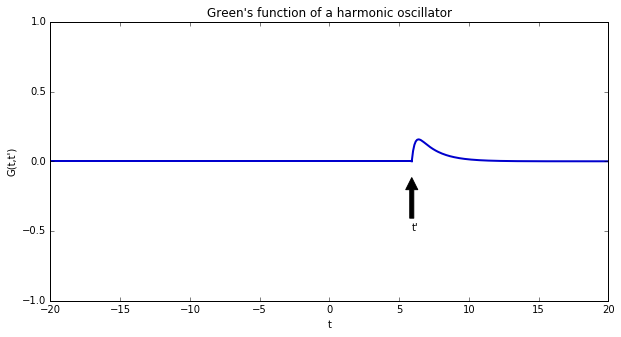

In [14]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, sqrt, sin, sinh, exp
import matplotlib.pyplot as plt

def plot_oscillator_greens_function(omega0, gamma, t2):
    tmin, tmax, nt = -20.0, 20.0, 150
    Gmin, Gmax = -1., 1.
    col = "mediumblue"
    
    ## t < t2 part:
    plt.figure(figsize=(10,5))
    plt.title("Green's function of a harmonic oscillator")
    plt.plot([tmin, t2], [0., 0.], '-', color=col, linewidth=2)

    ## t > t2 part:
    t = linspace(t2, tmax, nt)
    dt = t - t2
    if gamma < omega0:
        w1 = sqrt(omega0**2 - gamma**2)
        G = exp(-gamma*dt) * sin(w1*dt) / w1
    elif gamma > omega0:
        g1 = sqrt(gamma**2 - omega0**2)
        G = exp(-gamma*dt) * sinh(g1*dt) / g1
    else:
        
    plt.plot(t, G, 'b', color=col, linewidth=2)
    
    ## Add a guide to the eye
    plt.annotate("t'", xy=(t2, -0.1), xytext=(t2, -0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    ## Plot axes, etc.
    plt.xlabel('t')
    plt.ylabel("G(t,t')")
    plt.xlim(tmin, tmax)
    plt.ylim(Gmin, Gmax)

interact(plot_oscillator_greens_function,
         omega0= FloatSlider(min=0.1, max=5.0, step=0.1, value=2.0),
         gamma = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.1),
         t2    = FloatSlider(min=-10.0, max=10.0, step=0.1, value=0.0, description="t'"));

### Features of the Green's function<a name="properties"></a>

As previously noted, the time-domain Green's function has a physical meaning: it represents the motion of the oscillator in response to a force "pulse", $f(t) = m\, \delta(t-t')$. The basic features of the results obtained [in the previous section](#solution) match our intuition of what this motion should look like.

The first thing to notice is that the Green's function depends on $t$ and $t'$ only in the combination $t-t'$.  In hindsight, it is easy to see why, for the following reasons: (i) the differential operator on the left-hand side of the Green's function operator only involves $t$, and does not contain $t'$, (ii) the right-hand side of the Green's function operator contains the time variables only in the combination $t-t'$, which enters into the delta function, and (iii) the time variables stretch from $-\infty$ to $+\infty$ (there are no "hard boundary conditions" in the time coordinate).  Thus, any simultaneous shift in both $t$ and $t'$ leaves the Green's function unchanged.

For this reason, people sometimes define the frequency-domain Green's function as simply

$$G(\omega) = \int_{-\infty}^\infty dt \; e^{i\omega (t-t')}\, G(t-t').$$

Then this obeys the equation

$$\left[- \omega^2 - 2i \gamma\omega + \omega_0^2\right] G(\omega) = 1,$$

which is nice because there isn't an extraneous $t'$ variable floating around.

The next thing to notice is that the Green's function is zero for $t - t' < 0$, i.e. for times prior to the application of the pulse. This feature is referred to as "causality", and we will discuss it in greater detail [in the next section](#causality).

At $t - t' = 0$, there is no discontinuity in $x(t)$: the pulse does not cause the oscillator to "teleport" to a different position.  However, there is a discontinuity in the *velocity* of the oscillator.  To be more specific, let us integrate the Green's function equation over an infinitesimal interval of time surrounding $t'$:

$$\begin{align}\lim_{\epsilon \rightarrow 0} \int_{t'-\epsilon}^{t'+\epsilon} dt \left[\frac{\partial^2}{\partial t^2} + 2\gamma\frac{\partial}{\partial t} + \omega_0^2\right] G(t,t') &= \lim_{\epsilon \rightarrow 0} \int_{t'-\epsilon}^{t'+\epsilon} dt \; \delta(t-t') \\ &= \lim_{\epsilon \rightarrow 0} \left\{ \left.\frac{\partial G(t,t')}{\partial t}\right|_{t = t' +\epsilon} - \left.\frac{\partial G(t,t')}{\partial t}\right|_{t = t' - \epsilon}\right\} \\&= 1\end{align}$$

Hence, the pulse imparts one unit of velocity to the oscillator at $t=t'$.  If you look at the solutions obtained [in the previous section](#solution), you can verify that indeed $\partial G/\partial t = 0$ immediately before the pulse, and $\partial G/\partial t = 1$ immediately after the pulse.

For $t - t' > 0$, the applied force goes back to zero, and the system behaves like the undriven harmonic oscillator.  If the oscillator is under-damped ($\gamma < \omega_0$), it undergoes oscillation around the origin, which decays exponentially back to the origin as the energy imparted by the pulse is damped away.  If the oscillator is over-damped ($\gamma > \omega_0$), the oscillator moves for a distance, then decays exponentially back to the origin without oscillating.

### Causality<a name="causality"></a>

We have noted that the motion $x(t)$ ought to depend on the driving force $f(t')$ at all past times $t' < t$, but should *not* depend on the force at future times.  Because of the relation

$$x(t) = \int_{-\infty}^\infty dt'\; G(t,t')\, \frac{f(t')}{m},$$

this means that the Green's function ought to satisfy

$$G(t,t') = 0 \;\; \mathrm{for}\;\; t -t' < 0.$$

This condition is referred to as **causality**, because it is equivalent to saying that *cause* must precede *effect*.  A Green's function that satisfies it is called a **causal Green's function**.  The specific solution for $G(t,t')$ which we [derived earlier](#solution) is a causal Green's function.

The time-domain Green's function satisfies a second-order differential equation, so it has a family of solutions; the general solution contains two free parameters.  Not all solutions for the time-domain Green's function are causal.  We need to ask ourselves whether the specific solution we found in the previous section is the *only* possible causal solution.  It turns out that the answer is yes, and there are a couple of ways to see why.

The first approach is to observe that for $t > t'$, the Green's function satisfies the differential equation for the *undriven* harmonic oscillator. [But as we have noted](#properties), the Green's function must also obey two conditions at $t = t'$: (i) $G$ must be zero due to continuity, and (ii) the velocity must satisfy $\partial G / \partial t = 1$. These act as two boundary conditions for the undriven harmonic oscillator equation in the $t > t'$ domain.  Hence, the Green's function is completely specified.

The other way to see that the causal Green's function is unique is to imagine adding to our specific solution any solution $x_1(t)$ for the undriven harmonic oscillator.  It is easy to verify that the new form of $G(t,t')$ is still a solution to the differential equation for the Green's function.  As we saw [during our study of the damped harmonic oscillator](04_complex_oscillations.ipynb), the general solution for $x_1(t)$ contains two free parameters.  The general solution is always infinite for $t \rightarrow -\infty$, with one exception: the "trivial" solution $x_1(t) = 0$.  The trivial solution is a *specific* solution.  Thus, the causality requirement is equivalent to setting *two* boundary conditions.  The causal Green's function is a specific solution, containing no free parameters.

Finally, note that if we add a non-trivial undriven oscillator solution $x_1(t)$ to the Green's function, the Green's function would no longer have a convergence Fourier transform, since it would blow up in the $t \rightarrow -\infty$ limit.  Conversely, if we assume that the Fourier transform is convergent, that leads to a causal $G(t,t')$.  Hence, the causality condition is equivalent to having a convergent frequency-domain Green's function.

## Space-time Green's functions

We can also use the Green's function method to study the [wave equation](05_complex_waves.ipynb), in order to describe the emission (and absorption) of waves. For simplicity, we restrict our discussion to waves propagating through a uniform medium (i.e., a medium that is featureless through all of space and time). We also assume a single space dimension, given by coordinate $x$ (the generalization to the case of multiple space dimensions is pretty straightforward).

As we have [previously seen](05_complex_waves.ipynb), it is convenient to describe a wave using a complex wavefunction $\psi(x,t)$, which obeys the wave equation

$$\left[\frac{\partial^2}{\partial x^2} - \left(\frac{1}{c}\right)^2 \frac{\partial^2}{\partial t^2} \right] \psi(x,t) = 0.$$

Here, $c$ is the speed of wave propagation. Henceforth, to simplify the equations, we will set $c = 1$.  (You can go back to the previous case by replacing all instances of $t$ with $c t$, and $\omega$ with $\omega/c$, in the formulas that we will derive.)

The wave equation describes wave propagation in a featureless world; it contains no information about how a wave is generated in the first place. (This is similar to how the undriven oscillator equation says nothing about how the oscillation is produced.)  We can modify the equation by introducing a **source** on the right-hand side:

$$\left[\frac{\partial^2}{\partial x^2} - \frac{\partial^2}{\partial t^2} \right] \psi(x,t)\, = f(x,t).$$

The source term plays a role very similar to the driving force in the [driven harmonic oscillator problem](#driven-oscillator). In acoustics, for example, a "source" could correspond to the motion of a loudspeaker's membrane.

### Time-domain Green's function

The **time-domain Green's function** is defined for the wave equation by setting the source term to [delta functions](09_fourier_transform.ipynb#delta_function) in both space and time:

$$\left[\frac{\partial^2}{\partial x^2} - \frac{\partial^2}{\partial t^2} \right] G(x,x';t-t') = \delta(x-x')\, \delta(t-t').$$

As can be seen, $G$ is a function of two spatial variables, $x$ and $x'$, as well as two temporal variables $t$ and $t'$.  It corresponds to the wave generated by a pulse

$$f(x,t) = \delta(x-x')\,\delta(t-t').$$

The differential operator in the Green's function equation only involves $x$ and $t$, so we can regard $x'$ and $t'$ as parameters specifying where the pulse is localized in space and time.  This Green's function ought to depend on the time variables only in the combination $t-t'$ ([this is similar to our previous discussion of the Green's function for the driven harmonic oscillator](#properties)).  To emphasize this, we have written it as $G(x,x';t-t')$.  (We don't do the same for the space variables, for a subtle reason: for spatially finite or non-uniform systems, it turns out that the Green's function can depend on $x$ and $x'$ independently.  We'll come to this later.)

Just as for the harmonic oscillator, we can use the Green's function to construct a solution for the driven wave equation with an arbitrary source:

$$\psi(x,t) = \int dx' \,\int_{-\infty}^\infty dt'\; G(x,x';t-t') \, f(x', t').$$

This difference from the harmonic oscillator problem is that the Green's function and the source now depend on space as well as time, so we also need to integrate over space in order to obtain $\psi(x,t)$.  The Green's function thus contains information about how the influence of the source at one point in space and time *propagates* to other points in both space and time.

### Frequency-domain Green's function

The **frequency-domain Green's function** is obtained by Fourier transforming the time-domain Green's function in the $t-t'$ coordinate:

$$G(x,x';\omega) = \int_{-\infty}^\infty d\tau\; e^{i\omega \tau}\, G(x,x'; \tau).$$

It obeys the differential equation

$$\left[\frac{\partial^2}{\partial x^2} + \omega^2 \right] G(x,x';\omega) = \delta(x-x').$$

Just as we can write the time-domain solution to the wave equation in terms of the time-domain Green's function, we can do the same for the frequency-domain solution:

$$\Psi(x,\omega) = \int dx' \; G(x,x';\omega) \, F(x', \omega),$$

where

$$\Psi(x,\omega) = \int_{-\infty}^\infty dt \; e^{i\omega t} \, \psi(x,t), \quad F(x,\omega) = \int_{-\infty}^\infty dt \; e^{i\omega t} \, f(x,t).$$

Note that there is no integral over frequencies: the $\omega$ component of the solution involves only the $\omega$ components of the Green's function and the $-\omega$ components of the source contribute, without any contribution from other frequencies.

### Outgoing boundary conditions

In order to find the time-domain Green's function, it is simplest to solve for the frequency-domain Green's function first (we pursued a similar strategy when dealing with the [harmonic oscillator Green's function](#driven-oscillator)).

Before looking for a solution, we need to specify the boundary conditions.  That, however, depends on the situation we are interested in. One common setup is a enclosed cavity, where the waves propagate inside a finite domain, say $x \in (x_a,x_b)$.  For such situations, we usually impose **Dirichlet boundary conditions**, which state that $G(x,x';\omega) = 0$ at the edges of the domain.  The frequency-domain Green's function can then be solved by decomposing it into a series of basis functions defined within the finite domain, analogous to the [Fourier series](09_fourier_transform.ipynb#fourier_series).

We will instead focus on a more interesting situation, which occurs when the space coordinate is unbounded, and runs over the entire space $x \in (-\infty, \infty)$. This describes, for example, a loudspeaker that emits sound into empty space, or an antenna that radiates electromagnetic waves into empty space. The emitted waves should propagate outward from the source, and the boundary conditions describing this condition are called **outgoing boundary conditions**.  In 1D, this means that the Green's function should correspond to a left-moving wave for all $x$ to the left of the source, and to a right-moving wave for all $x$ to the right of the source.

We can guess the form of the Green's function which obeys such boundary conditions:

$$G(x,x';\omega) = \left\{\begin{array}{ll}A \, e^{-i\omega (x-x')}, & x \le x', \\ B \, e^{i\omega (x-x')}, & x \ge x'\end{array}\right. \quad \mathrm{for}\;\mathrm{some}\;\; A, B \in \mathbb{C}.$$

It is straightforward to verify that this formula for $G(x,x',\omega)$ satisfies the wave equation in both the regions $x < x'$ and $x > x'$, and that it satisfies outgoing boundary conditions.  We simply have to determine the $A$ and $B$ coefficients.  To do this, first note that $G(x,x')$ should be continuous at $x = x'$, so $A = B$.

Secondly, integrating the Green's function equation across $x'$ gives

$$\begin{align}\lim_{\epsilon \rightarrow 0} \int_{x'-\epsilon}^{x'+\epsilon} \left[\frac{\partial^2}{\partial x^2} + \omega^2\right]G(x-x') &= \lim_{\epsilon \rightarrow 0} \int_{x'-\epsilon}^{x'+\epsilon} \delta(x-x') \\ &= \lim_{\epsilon \rightarrow 0} \left\{ \left.\frac{\partial G}{dx} (x,x') \right|_{x = x'+\epsilon} - \left.\frac{\partial G}{\partial x} (x,x') \right|_{x = x'-\epsilon}\right\} = i\omega (B + A) = 1.\end{align}$$

Combining these two equations gives $A = B = 1/2i\omega$.  Hence, the Green's function for outgoing boundary conditions is

$$G(x,x';\omega) = \frac{e^{i\omega |x-x'|}}{2i\omega}.$$

## Causality and the time-domain Green's function

The outgoing frequency-domain Green's function derived in the previous section can be converted to a time-domain Green's function by the usual inverse Fourier transform:

$$\begin{align}G(x,x';t-t') &= \int_{-\infty}^\infty \frac{d\omega}{2\pi} \, e^{-i\omega (t-t')} \, G(x,x'; \omega) \\ &= \int_{-\infty}^\infty d\omega \, \frac{e^{i\omega \left[|x-x'| - (t-t')\right]}}{4\pi i\omega}\qquad (!)\end{align}$$

There is a problem with this formula: the integral runs over the real-$\omega$ line, yet the integrand has a pole on the real axis (at the origin).  The result is therefore ill-defined.  In order to resolve this, we redefine $G(x,x';\omega)$ as a contour integral taking place over a deformed contour, which is infinitesimally close to the real line but avoids the pole:

$$G(x,x';t-t') \equiv \int_\Gamma d\omega \, \frac{e^{i\omega \left[|x-x'| - (t-t')\right]}}{4\pi i\omega}.$$

We will choose to deform the contour in a very specific way, which turns out to be the way that satisfies the [principle of causality](#causality).  The deformed contour runs along the real axis, but skips above the pole at the origin:

<img src="img/causality_contour.png" alt="Contour for the causal Green's function."></img>

The contour integral can be solved by either [closing the contour](08_contour_integration.ipynb#contours_for_integration) in the upper half-plane, or in the lower half-plane. If we close the contour above, then the loop contour does not enclose the pole, and hence $G(x,x';t-t') = 0$. According to [Jordan's lemma](08_contour_integration.ipynb#jordans_lemma), we must do this if the exponent in the integrand obeys

$$|x-x'| - (t-t') > 0  \quad \Rightarrow \quad |x-x'| > t-t'.$$

This inequality is satisfied in two cases: either (i) $t < t'$ (in which case the inequality is satisfied for all $x,x'$ because $|x-x'|$ is strictly non-negative), or (ii) $t > t'$ but the value of $t-t'$ is smaller than $|x-x'|$.  To understand the physical meaning of these two cases, recall that $G(x,x';t-t')$ represents the field at position $x$ and time $t$ resulting from a pulse at the space-time point $(x',t')$.  Thus, case (i) corresponds to times occurring before the pulse, and case (ii) corresponds to times occurring after the pulse but positions which are too far away from the location of the pulse for a wave to reach $x$ from $x'$.

By contrast, for $|x-x'| - (t-t') < 0$ we can use the residue theorem to obtain $G(x,x';t-t') = -1/2$.  From this description, it is clear that the resulting time-domain Green's function is causal.  Unlike the harmonic oscillator case, causality for the wave equation imposes the addition requirement that waves must be given enough time to propagate between two specified points.

The time-domain wavefunction can therefore be written as

$$\psi(x,t) = \int_{-\infty}^\infty dx' \int_{-\infty}^\infty dt' \left[-\frac{1}{2}\,\Theta(t-t' - |x-x'|)\right] f(x',t'),$$

where $\Theta$ denotes the unit step function.  In other words, the wavefunction at each space-time point $(x,t)$ receives equal contribution from the sources $f(x',t')$ at space-time points $(x',t')$ which lie within the "past light cone".

## Exercises<a name="exercises"></a>

<ol>
<li>Find the time-domain Green's function of the critically-damped harmonic oscillator, for which $\gamma = \omega_0$.</li>
 
<li>Consider an overdamped harmonic oscillator ($\gamma > \omega_0$) subjected to a *random* driving force $f(t)$, which fluctuates between random  values, which can be either positive or negative, at each time $t$.  The random force satisfies

$$\left\langle f(t)\right\rangle = 0 \quad\mathrm{and}\;\;\;\left\langle f(t) f(t')\right\rangle = A \delta(t-t'),$$

where $\left\langle\cdots\right\rangle$ denotes an average taken over many realizations of the random force and $A$ is some constant which characterizes the overall magnitude of the random force.  Using the causal Green's function, compute the "correlation function" $\left\langle x(t_1)\, x(t_2) \right\rangle$.  Hence, show that for small time displacements $\Delta t$, the motion obeys

$$\left\langle [x(t+\Delta t) - x(t)]^2 \right\rangle \propto D \Delta t.$$

Compute the "diffusion constant" $D$. This result is called the **fluctuation-dissipation theorem**, which relates the strength of the fluctuations in a mechanical motion to the "diffusiveness" of its motion.
</li>
</ol>